# 7. 分散分析
３つ以上の平均値差の検定のこと。t検定は3つ以上の平均値差の検定には使えない

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline
from itertools import cycle

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


## 7.1 一元配置分散分析(対応なし)

### 7.1.1 一元配置分散分析を実行する
1. 帰無仮説$H_0$: 4群の母平均は等しい。\
対立仮説$H_1$: 4郡の母平均は等しくない。
2. 検定統計量の選択\
$ F = \cfrac{群間平方和 / 群間の自由度}{郡内平方和 / 郡内の自由度} $

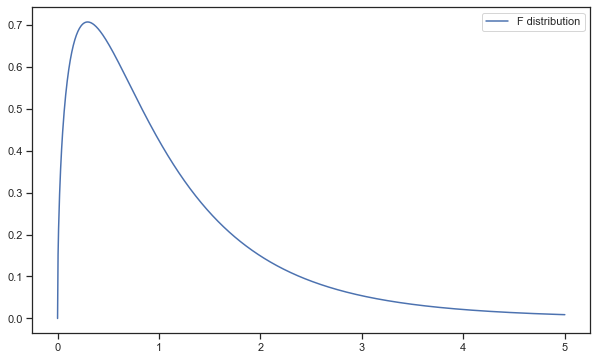

In [8]:
# F分布の描画
from scipy.stats import f
fig, ax = plt.subplots(1, 1, figsize=(10,6))

x = np.linspace(0, 5, 1000)
ax.plot(x, f.pdf(x, 3, 16), label='F distribution')
plt.legend()
plt.show()

4. 検定統計量の実現値を求める

In [12]:
A = df[df['Method']=='A']['Statistics_test2'].values
B = df[df['Method']=='B']['Statistics_test2'].values
C = df[df['Method']=='C']['Statistics_test2'].values
D = df[df['Method']=='D']['Statistics_test2'].values

In [20]:
# 検定統計量の実現値
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=7.111111111111112, pvalue=0.0029877831073873303)

p値が0.05よりも小さいので、帰無仮説を棄却する。\
つまり、5%水準で4つの指導法の間に有意な平均値差が見られたということが言える。

## 7.1.2 平方和の分解

In [21]:
all_data = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D})
all_data

,A,B,C,D
0,15,13,10,10
1,9,8,6,7
2,18,8,11,3
3,14,12,7,5
4,18,7,12,7


In [22]:
group_avg = all_data.mean()
group_avg

A    14.8
B     9.6
C     9.2
D     6.4
dtype: float64

In [30]:
all_avg = np.mean(all_data.values)
all_avg

10.0

In [31]:
all_avg_df = pd.DataFrame(np.repeat(all_avg, 20).reshape(5,4))
all_avg_df

,0,1,2,3
0,10.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0


In [37]:
group_avg_df = pd.DataFrame(np.repeat(group_avg.values, 5).reshape(4,5).T)
group_avg_df

,0,1,2,3
0,14.8,9.6,9.2,6.4
1,14.8,9.6,9.2,6.4
2,14.8,9.6,9.2,6.4
3,14.8,9.6,9.2,6.4
4,14.8,9.6,9.2,6.4


In [41]:
all_df = pd.DataFrame(all_data.values - all_avg_df.values)
all_df.columns = ['A', 'B', 'C', 'D']
all_df

,A,B,C,D
0,5.0,3.0,0.0,0.0
1,-1.0,-2.0,-4.0,-3.0
2,8.0,-2.0,1.0,-7.0
3,4.0,2.0,-3.0,-5.0
4,8.0,-3.0,2.0,-3.0


In [42]:
between_group = group_avg_df - all_avg_df
between_group

,0,1,2,3
0,4.8,-0.4,-0.8,-3.6
1,4.8,-0.4,-0.8,-3.6
2,4.8,-0.4,-0.8,-3.6
3,4.8,-0.4,-0.8,-3.6
4,4.8,-0.4,-0.8,-3.6


指導法Aを受けることで、平均点が全平均から4.8点押し上げられたと解釈できる。\
このような条件の違いで平均点が変わることを**効果**という。

In [43]:
in_group = pd.DataFrame(all_data.values - group_avg_df.values)
in_group.columns = ['A', 'B', 'C', 'D']
in_group

,A,B,C,D
0,0.2,3.4,0.8,3.6
1,-5.8,-1.6,-3.2,0.6
2,3.2,-1.6,1.8,-3.4
3,-0.8,2.4,-2.2,-1.4
4,3.2,-2.6,2.8,0.6


In [45]:
all_df**2

,A,B,C,D
0,25.0,9.0,0.0,0.0
1,1.0,4.0,16.0,9.0
2,64.0,4.0,1.0,49.0
3,16.0,4.0,9.0,25.0
4,64.0,9.0,4.0,9.0


In [46]:
between_group**2

,0,1,2,3
0,23.04,0.16,0.64,12.96
1,23.04,0.16,0.64,12.96
2,23.04,0.16,0.64,12.96
3,23.04,0.16,0.64,12.96
4,23.04,0.16,0.64,12.96


In [47]:
in_group**2

,A,B,C,D
0,0.04,11.56,0.64,12.96
1,33.64,2.56,10.24,0.36
2,10.24,2.56,3.24,11.56
3,0.64,5.76,4.84,1.96
4,10.24,6.76,7.84,0.36


In [49]:
# データ全体のばらつきの大きさを表しているといえる
all_squared_sum = np.sum((all_df**2).values)
all_squared_sum

322.0

In [50]:
# 郡の違いによって生じるばらつきを表しているといえる
between_group_squared_sum = np.sum((between_group**2).values)
between_group_squared_sum

184.00000000000003

In [51]:
# 全体で見たときに、同じ群の中での個人差の大きさを反映している
in_group_squared_sum = np.sum((in_group**2).values)
in_group_squared_sum

138.00000000000003

In [52]:
between_group_squared_sum + in_group_squared_sum

322.00000000000006

全体平方和 = 群間平方和 + 郡内平方和\
これを**平方和の分解**という。\
群の平均値の違いを、データのばらつきによって説明しようとするのが分散分析ということになる。

群間の自由度 = 郡の数 - 1\
郡内の自由度 = (各群のデータ数 - 1) をすべての群について合計したもの\
全体の自由度 = 全データ数 - 1

In [53]:
degree_between_group = len(all_data.columns) - 1
degree_between_group

3

In [54]:
degree_in_group = (len(all_data)-1)*(len(all_data.columns))
degree_in_group

16

In [55]:
degree_all = all_data.size - 1
degree_all

19

In [56]:
between_group_avg_squared = between_group_squared_sum / degree_between_group
between_group_avg_squared

61.33333333333334

In [57]:
in_group_avg_squared = in_group_squared_sum / degree_in_group
in_group_avg_squared

8.625000000000002

In [58]:
all_squared_sum / degree_all

16.94736842105263

In [59]:
df['Statistics_test2'].var()

16.94736842105263

In [60]:
F = between_group_avg_squared / in_group_avg_squared
F

7.111111111111111

### 7.1.2 多重比較 (Tukeyの方法)
各群におけるデータ数$n$が等しく、各群の母分散も等しいと仮定して、次式により検定統計量$q$を求める。\
$
q = \cfrac{|比較する郡の平均残差|}{\sqrt{郡内の平均平方 / 各群のデータ数}}
$

In [61]:
np.mean(A)

14.8

In [62]:
np.mean(D)

6.4

In [64]:
len(all_data)

5

In [65]:
in_group_avg_squared

8.625000000000002

In [66]:
q = np.abs(np.mean(A)-np.mean(D)) / np.sqrt(in_group_avg_squared/len(all_data))
q

6.3956506960658

検定統計量$q$が求められた。\
次に棄却域を求める。

In [ ]:
# ???tukeyの棄却域の求め方がわからない???

In [74]:
# Tuekyの多重比較用の関数
def tukey_hsd( lst, ind, n ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import numpy as np
    data_arr = np.hstack( lst )
    ind_arr = np.repeat(ind, n)
    print(pairwise_tukeyhsd(data_arr,ind_arr))

In [75]:
tukey_hsd( (A,B,C,D), list('ABCD') , 5)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.2 0.0563 -10.5145  0.1145  False
     A      C     -5.6 0.0371 -10.9145 -0.2855   True
     A      D     -8.4 0.0018 -13.7145 -3.0855   True
     B      C     -0.4    0.9  -5.7145  4.9145  False
     B      D     -3.2  0.345  -8.5145  2.1145  False
     C      D     -2.8 0.4574  -8.1145  2.5145  False
-----------------------------------------------------


## 7.2 一元配置分散分析(対応あり)
### 7.2.1 対応がないものとして分散分析してみる

In [77]:
algebra = np.array([7,8,9,5,6])
calculus = np.array([5,4,7,1,3])
statistics = np.array([8,6,7,2,5])
print( stats.f_oneway(algebra, calculus, statistics) )

F_onewayResult(statistic=2.6406250000000004, pvalue=0.11210798800331405)


### 7.2.2 一元配置分散分析(対応あり)を実行する
1. 帰無仮説$H_0$: 3科目の好意度の母平均は等しい\
   対立仮説$H_1$: 3科目の好意度の母平均は等しくない
2. 検定統計量の選択\
$
F = \cfrac{条件平方和 / 条件の自由度}{残差平方和 / 残差の自由度}
$
3. 有意水準$\alpha$の設定\
$\alpha = 0.05$とする。
4. 検定統計量の実現値を求める

In [101]:
# データの準備：DataFrameを作る
students = list(range(5))    # ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
# students = ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
favorness = np.hstack([algebra, calculus, statistics])
condition = np.repeat(['algebra','calculus','statistics'], 5)
# condition = np.repeat([0, 1, 2], 5)
subjects = np.array(students + students + students)

favor_df = pd.DataFrame({'Favorness':favorness,'Condition':condition,'Subjects':subjects})
favor_df

,Favorness,Condition,Subjects
0,7,algebra,0
1,8,algebra,1
2,9,algebra,2
3,5,algebra,3
4,6,algebra,4
5,5,calculus,0
6,4,calculus,1
7,7,calculus,2
8,1,calculus,3
9,3,calculus,4


In [102]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
aov = anova.AnovaRM(favor_df, 'Favorness', 'Subjects',['Condition'])
result = aov.fit()
print(result)

                Anova
          F Value Num DF Den DF Pr > F
--------------------------------------
Condition 14.6957 2.0000 8.0000 0.0021



5. $p$値が0.0021だから5%水準で科目間に有意な差があるということが分かる。

In [114]:
# F値の棄却域 上側確率0.05に対するFの値
stats.f.isf(0.05, 2, 8)

4.458970107524511

### 7.2.3 対応の有無による違い
対応を考慮するとFの分母である残差の平均平方の値が小さくなるため、Fの値は大きくなり、結果として有意になりやすい。

### 7.2.4 平方和の分解と自由度の計算
* 一元配置分散分析（対応なし）：\
全体平方和 = 群間平方和 + 郡内平方和
* 一元配置分散分析（対応あり）：\
全体平方和 = 条件平方和 + 個人差平方和 + 残差平方和

## 7.3 二元配置分散分析（対応なし）
2つの条件の組み合わせによって、母平均が異なるかどうかを検定する。\
3種類の銘柄のミネラルウォーターのおいしさについて、2種類の温度のもとで評定したデータを使用する。

### 7.3.1 主効果と交互作用効果
**要因**: 母平均に違いをもたらす原因と考えているもの\
**水準**: ある要因の中に含まれる個々の条件\
**主効果**: 一元配置分散分析のときの効果と同じもの\
**交互作用効果**: 2つい以上の要因が組み合わされたときに生じる効果

### 7.3.2 二元配置分散分析（対応なし）を分析する
1. 帰無仮説と対立仮説の設定\
    A: 温度の違い、B: 銘柄の違い\
    **要因Aの主効果:**\
    帰無仮説: 温度が違ってもおいしさ得点母平均は等しい。\
    対立仮説: 温度の違いによっておいしさ得点の母平均は異なる。\
    **要因Bの主効果:**\
    帰無仮説: 銘柄が違ってもおいしさ得点の母平均は等しい。\
    対立仮説: 銘柄の違いによっておいしさ得点の母平均は異なる。\
    **要因Aと要因Bの交互作用効果:**\
    帰無仮説: 温度と銘柄の組み合わせに相性の良さ悪しはない。\
    対立仮説: 温度と銘柄の組み合わせに相性の良し悪しがある。
2. 検定統計量の選択\
    分散分析では、$F$を用いる。
3. 有意水準の決定\
    有意水準は5%
4. 検定統計量の実現値を求める

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
# 味の評定
taste = [6,4,5,3,2,10,8,10,8,9,11,12,12,10,10,5,4,2,2,2,7,6,5,4,3,12,8,5,6,4]
# 温度 := 低温,  常温  
temperature = ['cold' for _ in range(15)]+['normal' for _ in range(15)] 
# ブランド:= イカアン, ボスビック, ビビッテル
bland = ['Ikaan' for _ in range(5)]+['Bosvic' for _ in range(5)] +  ['Vivittel' for _ in range(5)]
bland = bland+bland

In [4]:
print(taste)
print(temperature)
print(bland)

[6, 4, 5, 3, 2, 10, 8, 10, 8, 9, 11, 12, 12, 10, 10, 5, 4, 2, 2, 2, 7, 6, 5, 4, 3, 12, 8, 5, 6, 4]
['cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']
['Ikaan', 'Ikaan', 'Ikaan', 'Ikaan', 'Ikaan', 'Bosvic', 'Bosvic', 'Bosvic', 'Bosvic', 'Bosvic', 'Vivittel', 'Vivittel', 'Vivittel', 'Vivittel', 'Vivittel', 'Ikaan', 'Ikaan', 'Ikaan', 'Ikaan', 'Ikaan', 'Bosvic', 'Bosvic', 'Bosvic', 'Bosvic', 'Bosvic', 'Vivittel', 'Vivittel', 'Vivittel', 'Vivittel', 'Vivittel']


In [6]:
taste_df = pd.DataFrame({"taste":taste, "temp" : temperature, "bland" : bland})
taste_df

,taste,temp,bland
0,6,cold,Ikaan
1,4,cold,Ikaan
2,5,cold,Ikaan
3,3,cold,Ikaan
4,2,cold,Ikaan
5,10,cold,Bosvic
6,8,cold,Bosvic
7,10,cold,Bosvic
8,8,cold,Bosvic
9,9,cold,Bosvic


In [22]:
# Rのsummary(aov())と同じような関数
model = smf.ols("taste ~ temp * bland", taste_df).fit()
aov_table = sm.stats.anova_lm(model).round(7) # 小数点以下7桁まで
print(aov_table)

              df  sum_sq    mean_sq          F    PR(>F)
temp         1.0    67.5  67.500000  21.315790  0.000110
bland        2.0   155.0  77.500000  24.473684  0.000002
temp:bland   2.0    15.0   7.500000   2.368421  0.115151
Residual    24.0    76.0   3.166667        NaN       NaN


In [11]:
# 全体平方和の値について確認
print(67.5+155+15+76)
print(sum((taste-np.mean(taste))**2))

313.5
313.5


5. 帰無仮説の棄却or採択の決定\
    分散分析表の$p$値に着目
    * 温度の主効果: 5%水準で有意な効果がある ($p=0.000110$)
    * 銘柄の主効果: 5%水準で有意な効果がある ($p=0.000002$)
    * 温度と銘柄の交互作用効果: 5%水準で有意な効果はない ($p=0.115151$)

#### 交互作用効果の図の作成

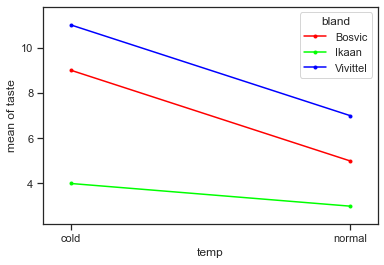

In [16]:
# 銘柄ごとの温度と味の関係図
import statsmodels
fig1 = statsmodels.graphics.factorplots.interaction_plot(taste_df.temp, taste_df.bland, taste_df.taste)

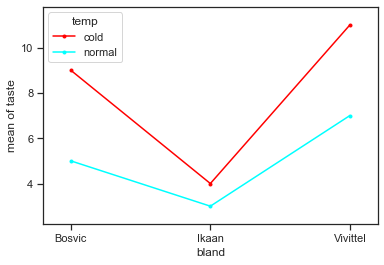

In [17]:
# 温度ごとの銘柄と味の関係図
import statsmodels
fig1 = statsmodels.graphics.factorplots.interaction_plot(taste_df.bland, taste_df.temp, taste_df.taste)

直線が完全には平行ではないので交互作用効果があるが、統計的には有意ではなかったということ。

### 7.3.3 一元配置と見なして分散分析をしてみる
温度の違いにのみ着目して一元配置分散分析をする

In [23]:
model = smf.ols("taste ~ temp", taste_df).fit()
aov_table = sm.stats.anova_lm(model).round(7) # 小数点以下7桁まで
print(aov_table)

            df  sum_sq    mean_sq         F    PR(>F)
temp       1.0    67.5  67.500000  7.682927  0.009797
Residual  28.0   246.0   8.785714       NaN       NaN


二元配置のときの「銘柄」「温度:銘柄」「Residuals」の平方和を足すと、246となり、一元配置の残差の平方和と一致する。\

## 7.4 二元配置分散分析（2要因とも対応あり）
3種類の銘柄、2種類の温度は対応のない場合と同じ\
ここでは5人の評定者が温度と銘柄を組み合わせた6つの条件全てでおいしさの評定を行っている。

対応のない場合と異なるのは、検定統計量の計算方法だけ。

In [27]:
participants = list(range(5))*6 # ["Muramatu","Kawasaki","Iguti","Matunaka","Jozima"]*6
print(participants)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [28]:
taste_df2 = pd.DataFrame({"taste":taste, "temp" : temperature, "bland" : bland, "person":participants})
taste_df2

,taste,temp,bland,person
0,6,cold,Ikaan,0
1,4,cold,Ikaan,1
2,5,cold,Ikaan,2
3,3,cold,Ikaan,3
4,2,cold,Ikaan,4
5,10,cold,Bosvic,0
6,8,cold,Bosvic,1
7,10,cold,Bosvic,2
8,8,cold,Bosvic,3
9,9,cold,Bosvic,4


In [32]:
from statsmodels.stats.anova import AnovaRM
model2 = AnovaRM(taste_df2, "taste", "person", within=["temp","bland"])
result2 = model2.fit()
print(result2)

                 Anova
           F Value  Num DF Den DF Pr > F
----------------------------------------
temp        18.0000 1.0000 4.0000 0.0132
bland      155.0000 2.0000 8.0000 0.0000
temp:bland   5.0000 2.0000 8.0000 0.0390



この結果は、個人差によるデータのばらつきを分析した結果である。\
$p$値に注目すると、「温度」の主効果、「銘柄」の主効果、これら2要因の交互作用効果とも5%水準で有意であることが分かる。

## 7.5 二元配置分散分析（1要因のみ対応あり）
今度は各評定者に冷蔵可常温のどちらかの温度条件に割り当てた上でその温度だけを3種類飲んでおいしさを評定したもの。\
7.4との違いは検定統計量の計算方法のみ

In [36]:
participants = list(range(5))*3+list(range(5,10))*3
taste_df3 = pd.DataFrame({"taste":taste, "temp" : temperature, "bland" : bland, "person":participants})
taste_df3

,taste,temp,bland,person
0,6,cold,Ikaan,0
1,4,cold,Ikaan,1
2,5,cold,Ikaan,2
3,3,cold,Ikaan,3
4,2,cold,Ikaan,4
5,10,cold,Bosvic,0
6,8,cold,Bosvic,1
7,10,cold,Bosvic,2
8,8,cold,Bosvic,3
9,9,cold,Bosvic,4


#### pyper
現状pythonではやり方が分からなかったので、pyperを使用してr上で実行した。

In [55]:
# 現状pythonではやり方が分からなかった
'''
model3 = AnovaRM(taste_df3, "taste", "person", within=["bland"], between=["temp"])
result3 = model3.fit()
print(result3)
###
#  Error message: Between subject effect not yet supported!
###
'''

# rと連携して実行する
import pyper
# R のインスタンスを作る
r = pyper.R(use_numpy=True, use_pandas=True)# defaultでnumpy,pandasともにTrue
# Python のオブジェクトを R に渡す
r.assign('taste', taste_df3['taste'].values)
r.assign('temp', taste_df3['temp'].values)
r.assign('bland', taste_df3['bland'].values)
r.assign('person2', taste_df3['person'].values+1)

In [56]:
print(r('taste'))
print(r('temp'))
print(r('bland'))
print(r('person2'))

try({taste})
 [1]  6  4  5  3  2 10  8 10  8  9 11 12 12 10 10  5  4  2  2  2  7  6  5  4  3
[26] 12  8  5  6  4

try({temp})
 [1] "cold"   "cold"   "cold"   "cold"   "cold"   "cold"   "cold"   "cold"  
 [9] "cold"   "cold"   "cold"   "cold"   "cold"   "cold"   "cold"   "normal"
[17] "normal" "normal" "normal" "normal" "normal" "normal" "normal" "normal"
[25] "normal" "normal" "normal" "normal" "normal" "normal"

try({bland})
 [1] "Ikaan"    "Ikaan"    "Ikaan"    "Ikaan"    "Ikaan"    "Bosvic"  
 [7] "Bosvic"   "Bosvic"   "Bosvic"   "Bosvic"   "Vivittel" "Vivittel"
[13] "Vivittel" "Vivittel" "Vivittel" "Ikaan"    "Ikaan"    "Ikaan"   
[19] "Ikaan"    "Ikaan"    "Bosvic"   "Bosvic"   "Bosvic"   "Bosvic"  
[25] "Bosvic"   "Vivittel" "Vivittel" "Vivittel" "Vivittel" "Vivittel"

try({person2})
 [1]  1  2  3  4  5  1  2  3  4  5  1  2  3  4  5  6  7  8  9 10  6  7  8  9 10
[26]  6  7  8  9 10



In [59]:
print(r('summary(aov(taste~temp*bland+Error(person2:temp+person2:temp:bland)))'))

try({summary(aov(taste~temp*bland+Error(person2:temp+person2:temp:bland)))})

Error: person2:temp
          Df Sum Sq Mean Sq F value Pr(>F)
temp       1  84.33   84.33   3.553  0.311
Residuals  1  23.74   23.74               

Error: person2:temp:bland
           Df Sum Sq Mean Sq
bland       2 134.30   67.15
temp:bland  2  18.65    9.32

Error: Within
           Df Sum Sq Mean Sq F value   Pr(>F)    
temp        1 10.134  10.134   10.67 0.004291 ** 
bland       2 21.948  10.974   11.55 0.000592 ***
temp:bland  2  3.306   1.653    1.74 0.203727    
Residuals  18 17.100   0.950                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



`+Error(person:temp+person:temp:bland)`では、個人差の要因である「person」と温度の違いの要因を表す「temp」が関わる組み合わせだけ指定している。\
versionの違いなのか出力の結果が違う。読み方がよくわからない。\

分散分析は、基本的には平均値の比較を行うための検定と言える。\
しかしそれだけではなく、主効果や交互作用効果といった異なる観点から、データにおけるばらつきがどのようにして生じているのかを探る方法であるということもできる。

### おまけ Rでの実行結果
以下で、他の二元分散分析もRで実行してみた。

In [51]:
# 二元配置分散分析（対応なし）
print(r('summary(aov(taste~temp*bland))'))

try({summary(aov(taste~temp*bland))})
            Df Sum Sq Mean Sq F value   Pr(>F)    
temp         1   67.5   67.50  21.316  0.00011 ***
bland        2  155.0   77.50  24.474 1.61e-06 ***
temp:bland   2   15.0    7.50   2.368  0.11515    
Residuals   24   76.0    3.17                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [52]:
# 上記と同様
print(r('summary(aov(taste~temp+bland+temp:bland))'))

try({summary(aov(taste~temp+bland+temp:bland))})
            Df Sum Sq Mean Sq F value   Pr(>F)    
temp         1   67.5   67.50  21.316  0.00011 ***
bland        2  155.0   77.50  24.474 1.61e-06 ***
temp:bland   2   15.0    7.50   2.368  0.11515    
Residuals   24   76.0    3.17                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [54]:
# 一元配置と見なした場合
print(r('summary(aov(taste~temp))'))

try({summary(aov(taste~temp))})
            Df Sum Sq Mean Sq F value Pr(>F)   
temp         1   67.5   67.50   7.683 0.0098 **
Residuals   28  246.0    8.79                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [58]:
# 二元配置分散文政（2要因とも対応あり）
r.assign('person1', taste_df2['person'].values+1)
print(r('person1'))
print(r('summary(aov(taste~temp*bland+Error(person1+person1:temp+person1:bland+person1:temp:bland)))'))

try({person1})
 [1] 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5

try({summary(aov(taste~temp*bland+Error(person1+person1:temp+person1:bland+person1:temp:bland)))})

Error: person1
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  43.35   43.35               

Error: person1:temp
     Df Sum Sq Mean Sq
temp  1  73.75   73.75

Error: person1:bland
      Df Sum Sq Mean Sq
bland  2  121.8   60.91

Error: person1:temp:bland
           Df Sum Sq Mean Sq
temp:bland  2  19.86   9.927

Error: Within
           Df Sum Sq Mean Sq F value   Pr(>F)    
temp        1   1.10   1.105   1.163    0.295    
bland       2  35.68  17.841  18.780 3.93e-05 ***
temp:bland  2   0.85   0.423   0.445    0.648    
Residuals  18  17.10   0.950                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



# 練習問題
#### 1

In [132]:
law = [75,61,68,58,66,55,65,63]
literature = [62,60,66,63,55,53,59,63]
science = [65,60,78,52,59,66,73,64]
engineering = [52,59,44,67,47,53,58,49]

In [133]:
score = np.hstack([law, literature, science, engineering])
print(score)

[75 61 68 58 66 55 65 63 62 60 66 63 55 53 59 63 65 60 78 52 59 66 73 64
 52 59 44 67 47 53 58 49]


In [134]:
faculty = ['law']*8 + ['literature']*8 + ['science']*8 + ['engineering']*8
print(faculty)

['law', 'law', 'law', 'law', 'law', 'law', 'law', 'law', 'literature', 'literature', 'literature', 'literature', 'literature', 'literature', 'literature', 'literature', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering']


In [135]:
test = list(range(8))*4
print(test)

[0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]


In [136]:
r.assign('score', score)
r.assign('faculty', np.array(faculty))# listだとstrのエラーが出る
r.assign('test', test)

# 対応なしでの一元分散分析をする
print(r('summary(aov(score~faculty))'))

try({summary(aov(score~faculty))})
            Df Sum Sq Mean Sq F value Pr(>F)  
faculty      3  606.4  202.12   4.515 0.0105 *
Residuals   28 1253.5   44.77                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



学部間での有意差を確認したかったのでfacultyの$p$値を確認する。5%以下なので有意であるといえる。\
続いて、多重比較を行う。

In [138]:
print(r('TukeyHSD(aov(score~faculty))'))

try({TukeyHSD(aov(score~faculty))})
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = score ~ faculty)

$faculty
                        diff        lwr       upr     p adj
law-engineering        10.25   1.115908 19.384092 0.0233773
literature-engineering  6.50  -2.634092 15.634092 0.2337032
science-engineering    11.00   1.865908 20.134092 0.0136621
literature-law         -3.75 -12.884092  5.384092 0.6799312
science-law             0.75  -8.384092  9.884092 0.9959313
science-literature      4.50  -4.634092 13.634092 0.5430095




$p$値を確認したところ、法学部と工学部、理学部と工学部の間で有意差があることが分かる。

ちなみに、テストに対応があるとした場合の分散分析は以下。\
これにそのまま`TuekyHSD`を適用するとエラーが出るので、ここでは学部間にだけ注目すればよい？

In [76]:
print(r('summary(aov(score~test+faculty))'))

try({summary(aov(score~test+faculty))})
            Df Sum Sq Mean Sq F value Pr(>F)  
test         1   25.1   25.15   0.553 0.4636  
faculty      3  606.4  202.12   4.443 0.0116 *
Residuals   27 1228.4   45.49                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### 2

In [142]:
score = [51,66,70,75,73,62,55,
         47,54,55,39,60,62,56,
         55,37,47,60,62,53,50]
print(score)

class_type = ['seminar']*7 + ['practice']*7 + ['training']*7
print(class_type)

person = ['A', 'B', 'C', 'D', 'E', 'F', 'G']*3
person_int = list(range(1,8))*3# int型を渡すのは問題がある！！！
print(person)
print(person_int)

[51, 66, 70, 75, 73, 62, 55, 47, 54, 55, 39, 60, 62, 56, 55, 37, 47, 60, 62, 53, 50]
['seminar', 'seminar', 'seminar', 'seminar', 'seminar', 'seminar', 'seminar', 'practice', 'practice', 'practice', 'practice', 'practice', 'practice', 'practice', 'training', 'training', 'training', 'training', 'training', 'training', 'training']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]


In [144]:
r.assign('score', score)
r.assign('class_type', np.array(class_type))#
r.assign('person', np.array(person))

# 対応ありでの一元分散分析をする
print(r('summary(aov(score~class_type+person))'))

# r('result <- data.frame(person=person, class_type=class_type, score=score)')
# print(r('summary(aov(score~class_type+person, result))'))

try({summary(aov(score~class_type+person))})
            Df Sum Sq Mean Sq F value Pr(>F)  
class_type   2  669.8   334.9   4.535 0.0341 *
person       6  411.0    68.5   0.927 0.5093  
Residuals   12  886.2    73.8                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



**要素がstr型だと結果が変わってしまう。**

In [145]:
r.assign('person_int', person_int)
print(r('summary(aov(score~class_type+person_int))'))

try({summary(aov(score~class_type+person_int))})
            Df Sum Sq Mean Sq F value Pr(>F)  
class_type   2  669.8   334.9   4.717 0.0235 *
person_int   1   90.1    90.1   1.269 0.2756  
Residuals   17 1207.0    71.0                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



検定結果は5%水準で有意となった。次に多重比較を行う。\
**比較を行う際にはint型ではうまく行かないので、str型でRに渡しておく必要がある。**

In [141]:
print(r('TukeyHSD(aov(score~class_type+person))'))

try({TukeyHSD(aov(score~class_type+person))})
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = score ~ class_type + person)

$class_type
                        diff         lwr        upr     p adj
seminar-practice   11.285714  -0.9689812 23.5404098 0.0721975
training-practice  -1.285714 -13.5404098 10.9689812 0.9578818
training-seminar  -12.571429 -24.8261241 -0.3167331 0.0442785

$person
           diff       lwr      upr     p adj
B-A   1.3333333 -23.22404 25.89070 0.9999940
C-A   6.3333333 -18.22404 30.89070 0.9651589
D-A   7.0000000 -17.55737 31.55737 0.9450707
E-A  14.0000000 -10.55737 38.55737 0.4633150
F-A   8.0000000 -16.55737 32.55737 0.9032053
G-A   2.6666667 -21.89070 27.22404 0.9996513
C-B   5.0000000 -19.55737 29.55737 0.9890754
D-B   5.6666667 -18.89070 30.22404 0.9795409
E-B  12.6666667 -11.89070 37.22404 0.5682600
F-B   6.6666667 -17.89070 31.22404 0.9558698
G-B   1.3333333 -23.22404 25.89070 0.9999940
D-C   0.6666667 -23.

検定結果より、実習と講義では5%水準で有意な差が見られた。